In [10]:
import tweepy
import pandas as pd
import time

# Initialize API keys (substitute with your actual keys)
api_key = 'Your API Key'
api_secret = 'Your Secret API KEY'
access_token = 'Your Access Token'
access_token_secret = 'Your Secret Access Token'
bearer_token = 'Your Bearer Token'

# Set up authentication
client = tweepy.Client(bearer_token=bearer_token)

# Define query
query = 'Ashluxe -is:retweet lang:en'

def fetch_tweets_with_backoff(query, max_results=20):
    wait_time = 60
    max_attempts = 5
    attempt = 0

    while attempt < max_attempts:try:
            # Fetch tweets
            response = client.search_recent_tweets(query=query, max_results=max_results)
            return response.data
        except tweepy.TooManyRequests:
            print(f"Rate limit reached. Sleeping for {wait_time} seconds...")
            time.sleep(wait_time)
            wait_time *= 2
            attempt += 1

    print("Max attempts reached. Could not fetch tweets due to rate limiting.")
    return None

tweets_data = fetch_tweets_with_backoff(query)

Rate limit reached. Sleeping for 60 seconds...
Rate limit reached. Sleeping for 120 seconds...
Rate limit reached. Sleeping for 240 seconds...
Rate limit reached. Sleeping for 480 seconds...


# **SENTIMENT ANALYSIS**

In [11]:
import pandas as pd
from textblob import TextBlob

# Function to analyze sentiment
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Ensure `tweets_data` is not empty before creating the DataFrame
if tweets_data:
    # Convert to DataFrame
    df = pd.DataFrame([tweet.text for tweet in tweets_data], columns=['Tweet'])

    # Apply sentiment analysis
    df['Sentiment'] = df['Tweet'].apply(get_sentiment)
    print(df.head())
else:
    print("No tweets were retrieved, so the DataFrame could not be created.")


                                               Tweet  Sentiment
0  Brands I’ll love love to model for ; \n@Zlatan...   0.386667
1  @harunajr_ @EmmyMics Goal for 2025 over take h...   0.160000
2  This girl don steal my Ashluxe 😢💔 🤦🏽‍♂️  \nIn ...   0.000000
3  Payper Corleone Ashluxe \nLoose Kaynon Win\n\n...   0.430769
4  🌐 Discover the secret to massive gains! Pump e...  -0.200000


# **Interpret the Sentiment:**
1. Positive sentiment: Polarity > 0

2. Neutral sentiment: Polarity = 0

3. Negative sentiment: Polarity < 0

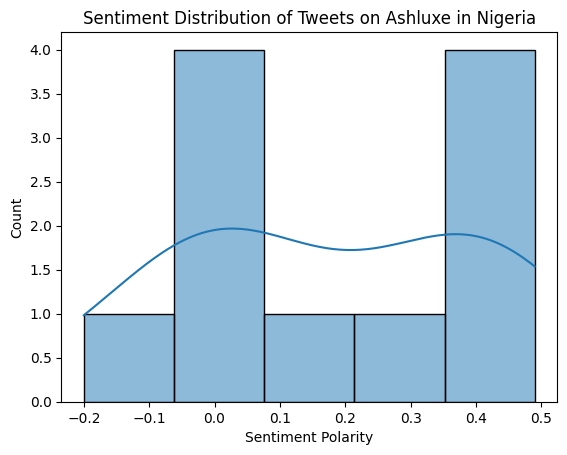

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot sentiment distribution
sns.histplot(df['Sentiment'], kde=True)
plt.xlabel('Sentiment Polarity')
plt.title('Sentiment Distribution of Tweets on Ashluxe in Nigeria')
plt.show()


In [13]:
# Calculate sentiment percentages
sentiment_counts = df['Sentiment'].value_counts(normalize=True) * 100
print("Sentiment Percentages:\n", sentiment_counts)

# If you want a clearer view
for sentiment, percentage in sentiment_counts.items():
    print(f"{sentiment}: {percentage:.2f}%")

Sentiment Percentages:
 Sentiment
 0.000000    36.363636
 0.386667     9.090909
 0.160000     9.090909
 0.430769     9.090909
-0.200000     9.090909
 0.300000     9.090909
 0.490000     9.090909
 0.400000     9.090909
Name: proportion, dtype: float64
0.0: 36.36%
0.38666666666666666: 9.09%
0.16: 9.09%
0.4307692307692308: 9.09%
-0.2: 9.09%
0.3: 9.09%
0.49: 9.09%
0.4: 9.09%
